In this module, we will first construct the graph of Hillary's senders and receivers, and then find the communities. Finally, we will generate the top twenty words in her list.

In [2]:
%matplotlib inline
import pandas as pd
import networkx as nx
from collections import Counter
import mpld3
from mpld3 import plugins
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [117]:
import nltk
from nltk.book import FreqDist

/Users/tbfang/anaconda3/lib/python3.5/site-packages/nltk/decorators.py:59: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  regargs, varargs, varkwargs, defaults = inspect.getargspec(func)


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [136]:
df_aliases = pd.read_csv('hillary-clinton-emails/Aliases.csv', index_col=0)
df_emails = pd.read_csv('hillary-clinton-emails/Emails.csv', index_col=0)
df_email_receivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv', index_col=0)
df_persons = pd.read_csv('hillary-clinton-emails/Persons.csv', index_col=0)

# a) Graph of Hillary Clinton's Email Senders

## Building the Graph

adapted from https://www.kaggle.com/gpayen/d/kaggle/hillary-clinton-emails/interaction-between-contacts/comments

We first build the aliases of the contacts, and then we extracted to and from (since graph is undirected), finally, we create the cross relations.

In [5]:
aliases = {df_aliases.Alias[idx]: df_aliases.PersonId[idx]
           for idx in df_aliases.index}
aliases['nan'] = 'nan'
# little fix for Aliases.csv
aliases['rosemarie.howe'] = aliases['rosemarie howe']
punkt = re.compile("[',\-]")

def tokenize(s):
    rec_list = punkt.sub('', s).split(';')
    return filter(lambda x: x != '', [x.lower().strip() for x in rec_list])

def id_ze(s):
    return [aliases[x] for x in tokenize(s)]

In [6]:
df_rel = df_emails[['MetadataFrom', 'MetadataTo']].dropna()
from_ = df_rel.MetadataFrom.apply(id_ze)
to_ = df_rel.MetadataTo.apply(id_ze)

In [7]:
def cross(iter1, iter2):
    for x in iter1:
        for y in iter2:
            if x < y:
                yield x, y
            elif x > y:
                yield y, x

In [8]:
emails = Counter()
emails_unary = Counter()
for (src, dest) in zip(from_, to_):
    for x, y in cross(src, dest):
        emails[x, y] += 1
        emails_unary[x] += 1
        emails_unary[y] += 1

In [9]:
g_sent = nx.Graph()
g_sent.add_weighted_edges_from(((u, v, log(n_emails+1))
                                for ((u, v), n_emails)
                                in emails.items()))

## Visualizing the Graph
adapted from https://www.kaggle.com/theurandon/d/kaggle/hillary-clinton-emails/people-interactions/comments

The interaction of Hillary's contacts can be visualized. Hillary Clinton is in the center, the nodes represent each contact in the email server and the edge represents the unweighted relation.

In [45]:
g = g_sent.subgraph(components[0])

cf = plt.gcf()
cf.set_size_inches((12, 12))
ax = cf.add_axes((0, 0, 1, 1))

pos = nx.spring_layout(g)

nodelist = g.nodes()
centrality = nx.current_flow_betweenness_centrality(g)
labels = [df_persons.Name.loc[node_id] for node_id in nodelist]
node_size = [200 + 800 * centrality[node_id] for node_id in nodelist]

n_emails = array([log(emails_unary[node_id]) for node_id in nodelist])
n_emails /= max(n_emails)

weights = array([g.edge[u][v]['weight'] for (u, v) in g.edges()])
weights = list(1.0 + 4.0 * weights / max(weights))

node_collection = nx.draw_networkx_nodes(
    g, pos, alpha=0.5, node_size=node_size,
    cmap='plasma', node_color=n_emails)
edge_collection = nx.draw_networkx_edges(
    g, pos, alpha=0.3, arrows=False, width=weights)

ax.set_axis_off()

# Add interactive tooltips
tooltip = plugins.PointLabelTooltip(node_collection, labels)
plugins.connect(cf, tooltip)

mpld3.display()

# b) Communities

We build the partitions using the community detection module from NetworkX. The result is a dictionary of the id of person and the community that person belongs in.

In [153]:
# building the partitions
partition = community.best_partition(G)

In [154]:
partition

{4: 0,
 5: 1,
 7: 2,
 9: 2,
 10: 3,
 11: 2,
 12: 2,
 13: 2,
 14: 4,
 15: 2,
 16: 2,
 17: 5,
 19: 2,
 20: 2,
 21: 2,
 22: 3,
 23: 6,
 24: 2,
 25: 2,
 29: 5,
 30: 2,
 31: 1,
 32: 3,
 34: 2,
 35: 3,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 7,
 42: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 4,
 48: 7,
 49: 2,
 50: 2,
 52: 2,
 53: 6,
 54: 2,
 55: 8,
 56: 2,
 57: 7,
 58: 3,
 59: 3,
 60: 6,
 63: 2,
 65: 2,
 66: 2,
 70: 3,
 72: 2,
 73: 2,
 74: 9,
 75: 9,
 76: 2,
 77: 10,
 80: 2,
 81: 3,
 85: 2,
 86: 6,
 87: 7,
 88: 4,
 89: 2,
 90: 2,
 91: 2,
 92: 3,
 93: 7,
 94: 10,
 95: 10,
 97: 3,
 98: 2,
 99: 3,
 100: 2,
 101: 2,
 102: 2,
 103: 2,
 105: 6,
 106: 3,
 107: 2,
 108: 11,
 109: 12,
 110: 2,
 111: 2,
 112: 2,
 113: 2,
 115: 3,
 116: 3,
 117: 3,
 118: 12,
 119: 2,
 120: 2,
 121: 2,
 122: 2,
 123: 2,
 124: 3,
 125: 8,
 127: 3,
 128: 2,
 129: 3,
 130: 2,
 131: 2,
 132: 2,
 133: 3,
 134: 13,
 135: 2,
 137: 3,
 138: 2,
 139: 2,
 140: 3,
 141: 2,
 142: 2,
 143: 2,
 144: 2,
 145: 7,
 146: 3,
 147: 2,
 148: 2,
 149: 2,

In [155]:
number_of_communities = 14

In [96]:
for i in range(0,number_of_communities+1):
    print('Community', i, ":")
    print({df_persons.Name.loc[k] for k, v in partition.items() if v==i}, '\n')

Community 0 :
{'WHADP', 'STATE', 'ASUNCION'} 

Community 1 :
{'Alec', 'Cheryl'} 

Community 2 :
{'Claire Coleman', 'Mike', 'Han Duk-soo', 'Recos', 'Mark Penn', 'Lee Feinstein', 'Colin Powell', 'Brian Greenspun', 'KellyC@state.gov', 'Esther Brimmer', 'Lynn Forester de Rothschild', 'mhcaleja@state.gov', 'Robert Russo', 'Nora Tov', 'Christopher Butzgy', 'John Podesta', 'Scott Gration', 'Miguel Rodriguez', 'American Beverage Association', 'Jackie Newmyer', 'Lois Quam', 'Maria Otero', 'Hillary Clinton', 'Max Baucus', 'Eric Woodard', 'Terry Duffy', 'Thomas Shannon', 'Marty Torrey', 'Rajiv Shah', 'Nora Toiv', 'David Miliband', 'Reines Philippe', 'Kris Balderston', 'Betsy Ebeling', 'postmaster@state.gov', 'Robert Blake', 'Bonnie Klehr', 'Victoria Nuland', 'Kent Conrad', 'Ellen Tauscher', 'Nancy Parrish', 'Christopher Hill', 'Joshua Daniel', 'David Garten', 'Barbara Mikulski', 'Anthony Lake', 'M. Albright', 'Philip Gordon', 'Derek Chollet', 'PVervee', 'Piper Campbell', 'Daniel Baer', 'Gina Glan

## Find the Top Words Each Community

In [122]:
def is_notnumber(s):
    try:
        float(s)
        return False
    except ValueError:
        return True
    
def remove_stopwords(word_list):
    Wlist = [word for word in word_list if word not in stopwords.words('english')]
    Wlist = [word for word in word_list if is_notnumber(word) and len(word) > 1]
    return (Wlist)

In [149]:
dataframe_stopwords = ['DataFrame', 'ExtractedBodyText','Columns','Empty','Index','...','Id','DataFrame']

### Top Words in Each Community

In [152]:
for i in range(0,15): # communities
    print('Community', i, ":")
    for person_id in {k for k, v in partition.items() if v==i}:
        text = ''.join(df_emails[df_emails['SenderPersonId'] == person_id].to_string(columns={'ExtractedBodyText'}))
    text = nltk.tokenize.word_tokenize(text) # tokenizing
    for word in text: 
        if word in dataframe_stopwords:
            text.remove(word)
    text = remove_stopwords(text)
    fdist = FreqDist(text)
    print(fdist.most_common(20),'\n')

Community 0 :
[('Id', 1)] 

Community 1 :
[('DataFrame', 1)] 

Community 2 :
[('right', 1), ('surprise', 1), ('Id', 1), ('You', 1), ('were', 1), ('Vitamin', 1), ('no', 1), ('about', 1)] 

Community 3 :
[('DataFrame', 1)] 

Community 4 :
[('Id', 1)] 

Community 5 :
[('Id', 1)] 

Community 6 :
[('DataFrame', 1)] 

Community 7 :
[('is', 3), ('the', 3), ('Palau', 3), ('of', 3), ('statement', 2), ('Below', 2), ('to', 2), ('Id', 1), ('Want', 1), ('will', 1), ('Would', 1), ("n't", 1), ('sure', 1), ('Co-Chairs', 1), ('ebeigetu', 1), ('Toribiong', 1), ('saw', 1), ('on', 1), ('recent', 1), ('call', 1)] 

Community 8 :
[('DataFrame', 1)] 

Community 9 :
[('Id', 1)] 

Community 10 :
[('DataFrame', 1)] 

Community 11 :
[('Id', 1), ('your', 1), ('information', 1), ('for', 1), ('below.\\nWerner', 1), ('Gentlemen', 1)] 

Community 12 :
[('Id', 1)] 

Community 13 :
[('Id', 1)] 

Community 14 :
[('DataFrame', 1)] 



After removing stopwords, the only significant top lists are from larger communities. The list is considerably different from the topic modelling.

## Visualizing the Communities
adapted from https://www.kaggle.com/gpayen/d/kaggle/hillary-clinton-emails/interaction-between-contacts/comments

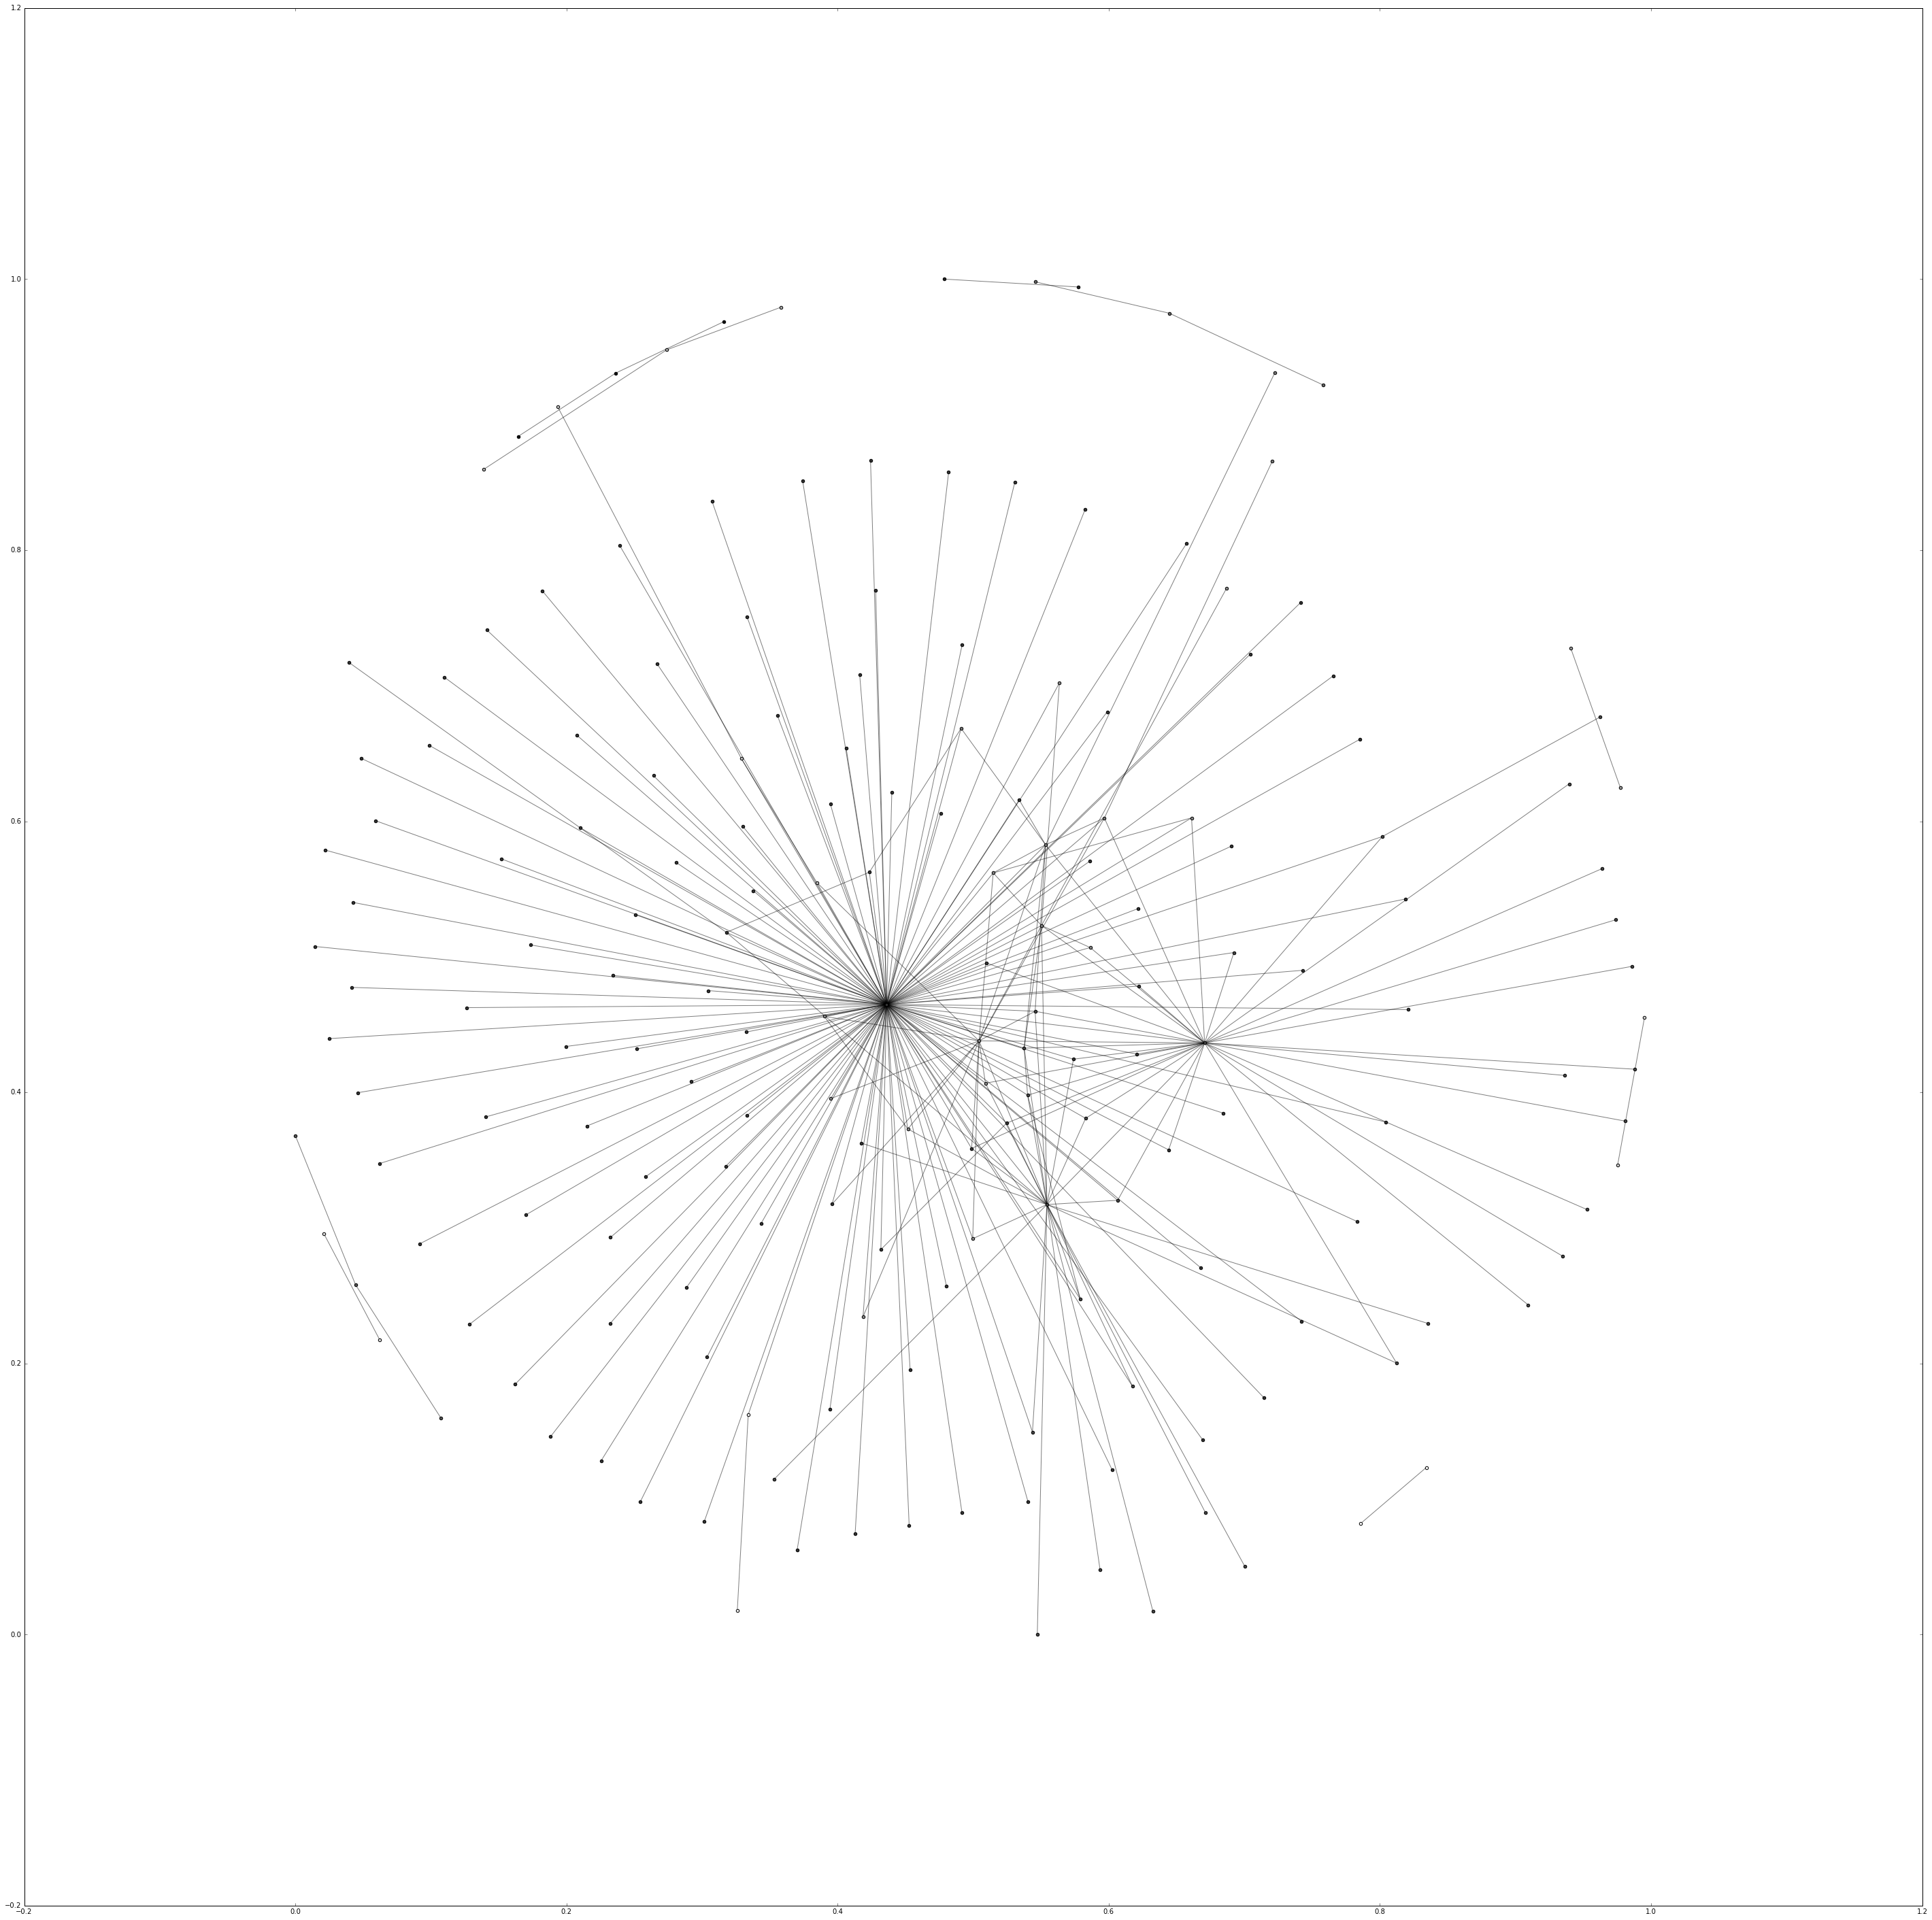

In [58]:
G = g_sent

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()